# **Proyección Económica y Demanda Laboral 📈**


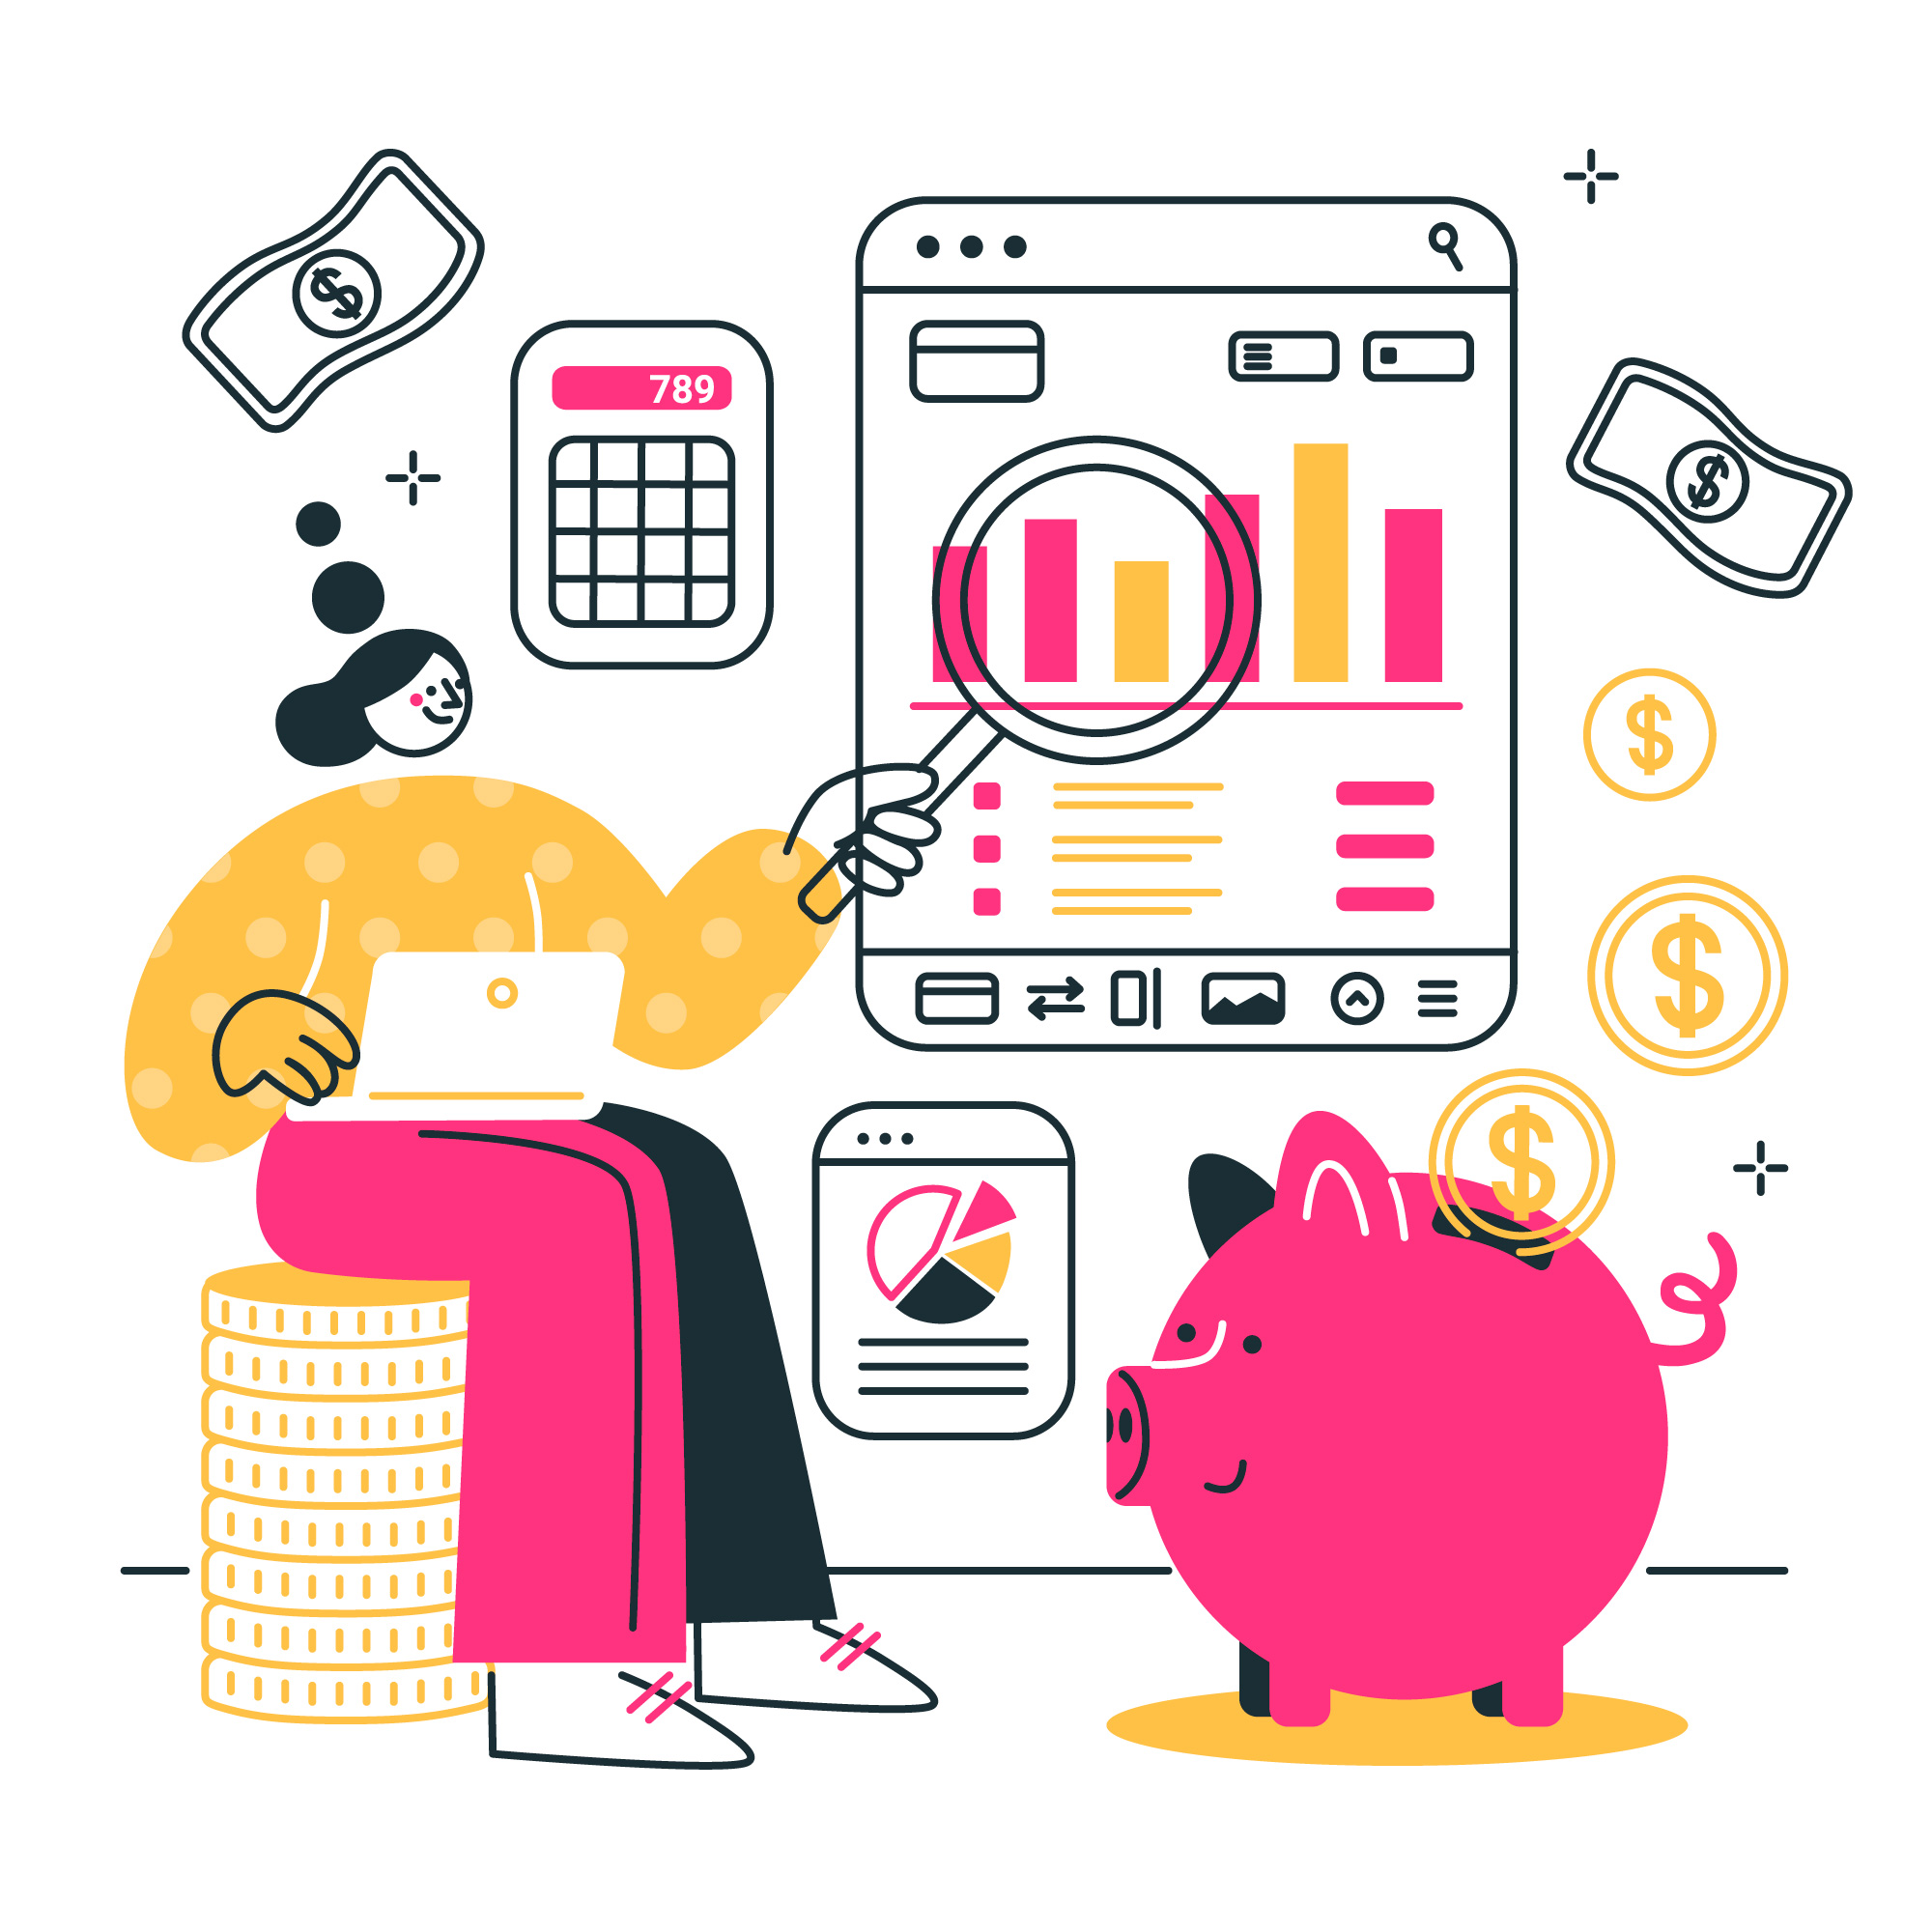

### **Introducción**
El objetivo principal de este proyecto es analizar la relación entre las actividades económicas y el número de personas que se encuentran dentro de las miasmas, así como proyectar el impacto futuro de la demanda laboral en el mercado. Con base en este análisis, se buscará determinar si existe una correlación significativa entre las actividades con alta demanda y su correspondiente campo laboral.

###**Metodología**




1.   Recopilación de datos: Se obtendrán datos sobre actividades económicas y demanda laboral de fuentes gubernamentales y bases de datos especializadas.
2.   Procesamiento de datos: Los datos serán limpiados y preparados para el análisis, incluyendo la identificación y corrección de posibles errores.
3. Análisis estadístico: Se aplicará regresión lineal para evaluar la relación entre la demanda de carreras y el campo laboral, considerando variables como la tasa de desempleo, la oferta educativa y otras variables relevantes.
4. Proyección a futuro: Se utilizarán técnicas de modelado para prever el impacto de la demanda actual en la oferta laboral futura.


###**Plan de trabajo**


*   Recopilación de datos.
* Procesamiento y análisis de datos.
* Interpretación de resultados.
* Elaboración del informe final.





In [2]:
#Primero importamos las librerias que necesitaremos para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Podemos acceder al dataset desde los datos abiertos de Gobierno de México en el apartado de [Indicadores Estratégicos/Población Ocupada por Actividad Económica](https://datos.gob.mx/busca/dataset/indicadores-estrategicos-poblacion-ocupada-por-actividad-economica), o como lo haremos en esta ocasión, importandolo desde google drive.


In [5]:
## Generamos un dataframe en donde importaremos nuestra base de datos desde drive
df_actividadesecono = pd.read_csv('/content/drive/MyDrive/Remoto Datasets/actividades_economicas.csv', index_col=0, encoding='latin-1')
df_actividadesecono.head(15)

,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
Periodo,,,,,
20110301,Baja California Sur,Mujer,45 A 64 AÑOS,Servicios Sociales,6502
20110301,Morelos,Mujer,45 A 64 AÑOS,"Transportes, Comunicaciones, Correo y Almacena...",1048
20110301,Oaxaca,Mujer,65 AÑOS Y MAS,Restaurantes y Servicios de Alojamiento,1455
20110301,Aguascalientes,Hombre,25 A 44 AÑOS,Restaurantes y Servicios de Alojamiento,3349
20110301,Sonora,Hombre,25 A 44 AÑOS,Restaurantes y Servicios de Alojamiento,13494
20110301,Nayarit,Hombre,65 AÑOS Y MAS,Comercio,2072
20110301,Nayarit,Hombre,45 A 64 AÑOS,Gobierno y Organismos Internacionales,5351
20110301,Baja California,Hombre,25 A 44 AÑOS,"Transportes, Comunicaciones, Correo y Almacena...",24740
20110301,Estado de México,Hombre,65 AÑOS Y MAS,Comercio,48540


In [ ]:
# Paso 4: Información Detallada del DataFrame
# -------------------------------------------
# Proporcionamos información detallada sobre las columnas y los tipos de datos en el DataFrame mediante el método index ().
df_actividadesecono.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156707 entries, 20110301 to 20231201
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Entidad_Federativa   156707 non-null  object
 1   Sexo                 156707 non-null  object
 2   Grupo_edad           156707 non-null  object
 3   Actividad_economica  156707 non-null  object
 4   Numero_personas      156707 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 7.2+ MB


In [ ]:
# Paso 5: Dimensiones del DataFrame
# ---------------------------------
# Obtener las dimensiones del DataFrame, es decir, el número de filas y columnas con la función shape.
df_actividadesecono.shape

(156707, 5)

In [ ]:
# Paso 6: Descripción Estadística del DataFrame
# --------------------------------------------
# Proporcionar información estadística descriptiva básica sobre el DataFrame.

df_actividadesecono.describe()

,Numero_personas
count,1.567070e+05
mean,3.439466e+04
std,1.464507e+05
min,8.000000e+00
25%,1.533000e+03
50%,7.021000e+03
75%,2.176150e+04
max,2.920627e+06


In [ ]:
# Paso 7: Identificación de Valores Nulos en el DataFrame
# ------------------------------------------------------
# Comprobamos la presencia de valores nulos en el DataFrame y contamos la cantidad de nulos por columna.

# La función isnull() retorna un DataFrame booleano indicando la presencia de valores nulos.
# La función sum() aplicada a este DataFrame booleano suma los True (1) por columna, indicando el número de valores nulos en cada una.

df_actividadesecono.isnull().sum()

Entidad_Federativa     0
Sexo                   0
Grupo_edad             0
Actividad_economica    0
Numero_personas        0
dtype: int64

In [ ]:
# Paso 8: Eliminación de Filas con Valores Nulos en el DataFrame
# -------------------------------------------------------------
# Eliminamos las filas que contienen al menos un valor nulo en el DataFrame.

# La función dropna() elimina las filas que contienen al menos un valor nulo.
# El parámetro inplace=True realiza la modificación directamente en el DataFrame original.

df_actividadesecono.dropna(inplace=True)
# Paso 9: Conteo de Valores Nulos en el DataFrame
# ----------------------------------------------
# Verificamos la cantidad de valores nulos por columna en el DataFrame.

df_actividadesecono.isnull().sum()

Entidad_Federativa     0
Sexo                   0
Grupo_edad             0
Actividad_economica    0
Numero_personas        0
dtype: int64

In [ ]:
# Paso 10: Dimensiones Actuales del DataFrame después de Limpieza
# --------------------------------------------------------------
# Obtener las dimensiones actuales del DataFrame después de la eliminación de filas con valores nulos.

df_actividadesecono.shape

(156707, 5)

In [ ]:
# Paso 11: Identificación de Filas Duplicadas en el DataFrame
# ----------------------------------------------------------
# Contamos la cantidad de filas duplicadas en el DataFrame.

# La función duplicated() retorna un DataFrame booleano que indica si cada fila es una duplicada de otra fila.
# La función sum() aplicada a este DataFrame booleano suma los True (1) por fila, indicando el número total de filas duplicadas.

df_actividadesecono.duplicated().sum()

# Fin de la limpieza de Datos

1595

In [ ]:
# Paso 12: Cálculo de Estimados de Locación para Columnas Numéricas
# ----------------------------------------------------------------
# Definimos una lista de las columnas numéricas en el DataFrame y calculamos los estimados de locación para estas columnas.

# Lista de nombres de columnas numéricas que queremos analizar.
columnas_numericas = ['Numero_personas'] #

# Calculamos la media y la mediana de los valores en estas columnas.
# - La media representa el valor promedio de los datos
# - La mediana es el valor que separa la mitad superior e inferior de los datos ordenados.

media_valores = df_actividadesecono[columnas_numericas].mean()  # Calculamos la media para cada columna numérica.
mediana_valores = df_actividadesecono[columnas_numericas].median()  # Calculamos la mediana para cada columna numérica.

In [ ]:
# Paso 13: Cálculo de Estimados de Variabilidad para Columnas Numéricas
# ---------------------------------------------------------------------
# Definimos una lista de las columnas numéricas en el DataFrame y calculamos los estimados de variabilidad para estas columnas.

# Lista de nombres de columnas numéricas que queremos analizar.
columnas_numericas = ['Numero_personas']

# Calculamos diferentes estimados de variabilidad para estas columnas.
# - El rango es la diferencia entre el valor máximo y mínimo en los datos.
# - La desviación estándar es una medida de la dispersión de los datos alrededor de la media.
# - El rango intercuartílico (IQR) es la diferencia entre el tercer y primer cuartil.

# Calculamos el rango, la desviación estándar y el IQR para cada columna numérica.
rango_valores = df_actividadesecono[columnas_numericas].max() - df_actividadesecono[columnas_numericas].min()  # Calculamos el rango.
desviacion_estandar_valores = df_actividadesecono[columnas_numericas].std()  # Calculamos la desviación estándar.
iqr_valores = df_actividadesecono[columnas_numericas].quantile(0.75) - df_actividadesecono[columnas_numericas].quantile(0.25)  # Calculamos el IQR.

In [ ]:
# Paso 14: Creación de un DataFrame de Resultados
# ----------------------------------------------
# Creamos un DataFrame llamado 'resultados' que contiene los estimados de locación y variabilidad para las columnas numéricas.

# Creamos el DataFrame 'resultados' con las siguientes columnas:
# - 'Media': contiene los valores de media calculados previamente.
# - 'Mediana': contiene los valores de mediana calculados previamente.
# - 'Rango': contiene los valores de rango calculados previamente.
# - 'Desviación Estándar': contiene los valores de desviación estándar calculados previamente.
# - 'IQR': contiene los valores de rango intercuartil (IQR) calculados previamente.

resultados = pd.DataFrame({
    'Media': media_valores,
    'Mediana': mediana_valores,
    'Rango': rango_valores,
    'Desviación Estándar': desviacion_estandar_valores,
    'IQR': iqr_valores
})

# Mostramos el DataFrame 'resultados' que resume los estimados de locación y variabilidad.
print(resultados)

                        Media  Mediana    Rango  Desviación Estándar      IQR
Numero_personas  34394.655504   7021.0  2920619        146450.665855  20228.5


Una vez que visualizamos el dataset, sus dimensiones y realizamos una limpieza general del mismo, nos damos cuenta que es demasiado grande, por lo que decidimos sesgar la información recopilada a solo Ciudad de méxico dentro del periodo 2011.03.01 a 2023.12.01

## **Actividades Economicas exclusivamente en Ciudad de México**

In [6]:
# Filtramos las filas donde "Entidad_Federativa" es igual a "Ciudad de México"
df_cdmx = df_actividadesecono[df_actividadesecono['Entidad_Federativa'] == 'Ciudad de México']

# Ahora df_cdmx contiene solo las filas correspondientes a Ciudad de México
df_cdmx.head(10)

,Entidad_Federativa,Sexo,Grupo_edad,Actividad_economica,Numero_personas
Periodo,,,,,
20110301,Ciudad de México,Hombre,45 A 64 AÑOS,No Especificado,2497
20110301,Ciudad de México,Hombre,65 AÑOS Y MAS,Gobierno y Organismos Internacionales,6377
20110301,Ciudad de México,Mujer,65 AÑOS Y MAS,Comercio,20644
20110301,Ciudad de México,Mujer,65 AÑOS Y MAS,Servicios Sociales,5398
20110301,Ciudad de México,Hombre,65 AÑOS Y MAS,Industria Extractiva y de la Electricidad,933
20110301,Ciudad de México,Hombre,25 A 44 AÑOS,Industria Manufacturera,148996
20110301,Ciudad de México,Hombre,45 A 64 AÑOS,"Transportes, Comunicaciones, Correo y Almacena...",70811
20110301,Ciudad de México,Hombre,15 A 24 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",956
20110301,Ciudad de México,Hombre,45 A 64 AÑOS,"Agricultura, Ganadería, Silvicultura, Caza y P...",1026


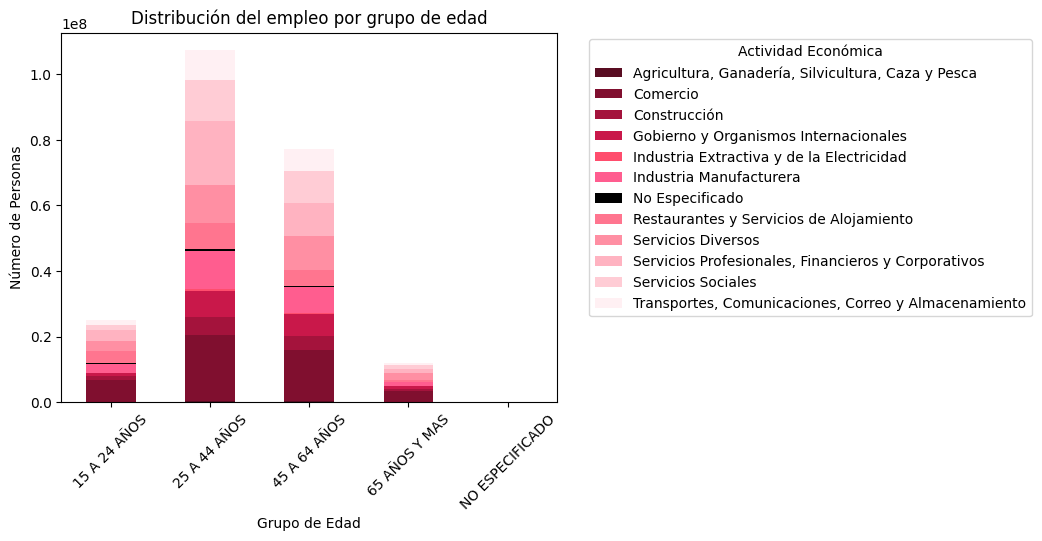

In [ ]:
# @title Distribución del empleo por grupo de edad
# Agrupar y sumar el número de personas por grupo de edad y actividad económica
grouped_data = df_cdmx.groupby(['Grupo_edad', 'Actividad_economica'])['Numero_personas'].sum().unstack()

# Definir los colores deseados
colores = ['#590D22', '#800F2F', '#A4133C', '#C9184A', '#FF4D6D', '#ff5d8f', 'black', '#FF758F', '#FF8FA3', '#FFB3C1', '#FFCCD5', '#FFF0F3' ]

# Graficar la distribución del empleo por grupo de edad con colores personalizados
grouped_data.plot(kind='bar', stacked=True, color=colores)

# Mostramos la gráfica
plt.xlabel('Grupo de Edad')
plt.ylabel('Número de Personas')
plt.title('Distribución del empleo por grupo de edad')
plt.legend(title='Actividad Económica', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Gráfica de columnas

La presente práctica muestra un gráfico sobre la distribución del empleo por grupo de edad. El gráfico muestra la demanda laboral mediante un eje de abscisas donde se representa la cronología (es decir, el grupo de edad en que tiene mayor ) y un eje de coordenadas que muestra la producción industrial.

<ipython-input-38-73ceb1d02b72>:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

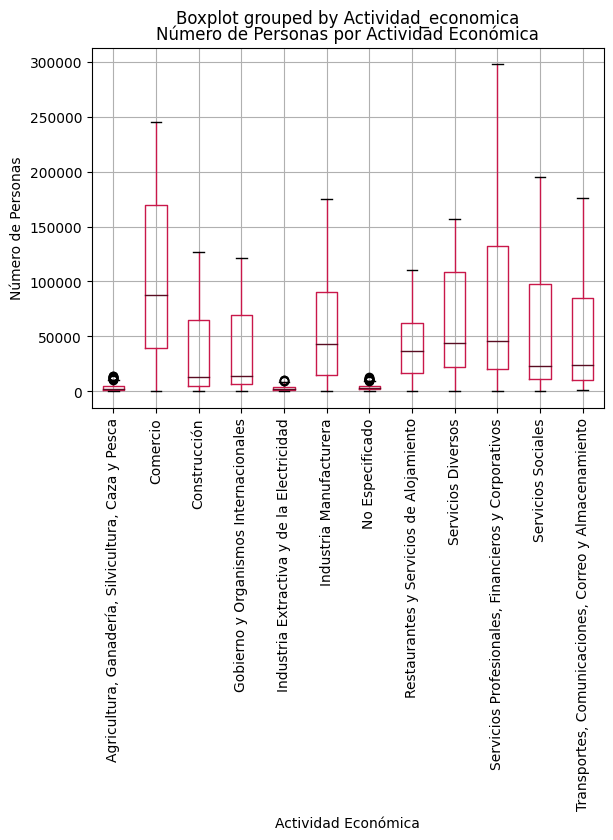

In [ ]:
#@title Número de personas por actividad economica
# Tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Colores personalizados
color = {'boxes': '#C9184A', 'whiskers': '#C9184A', 'medians': '#590D22', 'caps': 'black'}

# Graficar el boxplot con colores personalizados
df_cdmx.boxplot(column='Numero_personas', by='Actividad_economica', color=color)

# Ajustes adicionales
plt.xlabel('Actividad Económica')
plt.ylabel('Número de Personas')
plt.title('Número de Personas por Actividad Económica')

# Mostrar la gráfica
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Diagrama de caja

En la gráfica podemos observar cuales son las actividades económicas que tienen una mayor demanda en la cpaital, siendo los servicios profesionales como los financieros y corporativos en primer puesto, siguiendo con el comercio y en tercer puesto los servicios sociales.

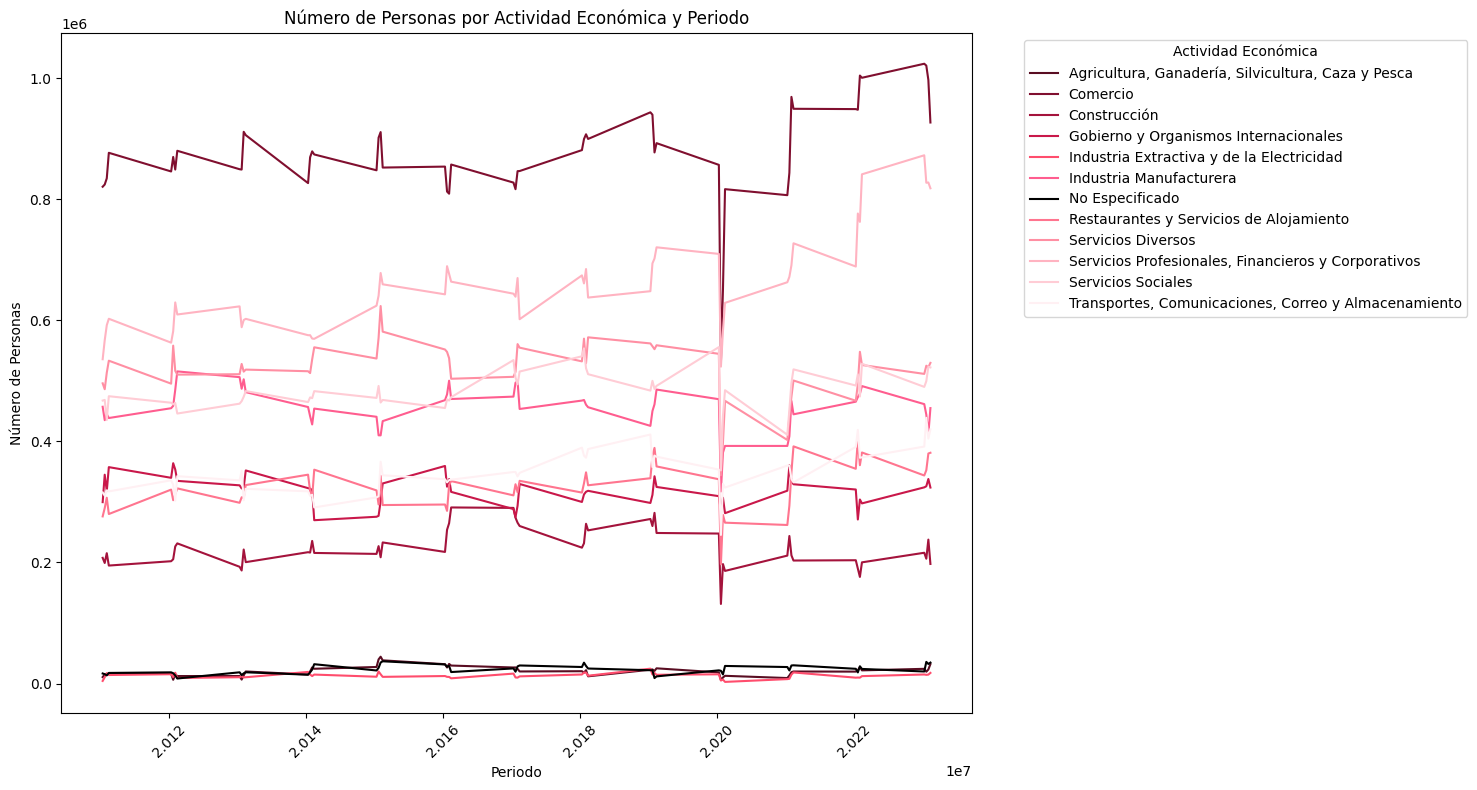

In [ ]:
# @title Número de personas por actividad por periodo

# Definimos el tamaño de la gráfica y la configuración de los subplots para crear una figura y ejes separados
fig, ax = plt.subplots(figsize=(15, 8))


df_cdmx.groupby(['Periodo', 'Actividad_economica'])['Numero_personas'].sum().unstack().plot(
    kind='line',  #Definimos líneas para nuestro grafico, aunque podría ser cualquier otro (line, bar, etc.)
    color=['#590D22', '#800F2F', '#A4133C', '#C9184A', '#FF4D6D', '#ff5d8f', 'black', '#FF758F', '#FF8FA3', '#FFB3C1', '#FFCCD5', '#FFF0F3' ],
    ax=ax  # Utilizamos los mismos ejes definidos para la figura como argumento a la función plot()
)
# Ajustes adicionales
ax.set_xlabel('Periodo')
ax.set_ylabel('Número de Personas')
ax.set_title('Número de Personas por Actividad Económica y Periodo')

# Mostrar la gráfica
ax.legend(title='Actividad Económica', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar la leyenda a un lado del gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Gráficos de línea

Se observa la evolución histórica de la actividades económicas en la capital, teniendo una gran baja en el año del 2020 como consecuencia de la pademia que se enfrnetaba en ese periodo.

<ipython-input-68-4a3fc026ea82>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_por_genero_actividad = df_cdmx.groupby(['Actividad_economica', 'Sexo']).sum()['Numero_personas'].unstack()


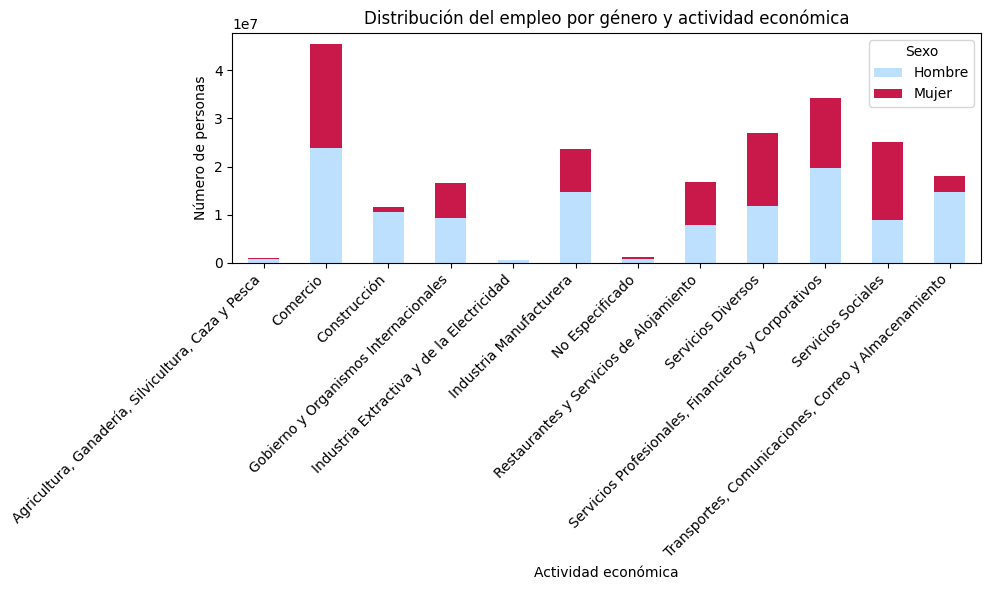

In [ ]:
# @title Distribución del empleo por género y actividad económica

# Realizamos la distribución del empleo por género y actividad económica
df_por_genero_actividad = df_cdmx.groupby(['Actividad_economica', 'Sexo']).sum()['Numero_personas'].unstack()
# Agrupamos por actividad económica y sexo, sumamos el número de personas y desagregamos por sexo
# Luego, desagregamos por sexo para tener dos columnas, una para hombres y otra para mujeres

# Configuramos el gráfico de barras apiladas
colores_personalizados = ['#bde0fe', '#C9184A']
grafico = df_por_genero_actividad.plot.bar(stacked=True, figsize=(10, 6), color=colores_personalizados)
# Creamos un gráfico de barras apiladas con el DataFrame resultante, donde cada barra representa una actividad económica

# Personalizar el gráfico
plt.title('Distribución del empleo por género y actividad económica')
plt.xlabel('Actividad económica')
plt.ylabel('Número de personas')
plt.legend(title='Sexo')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar el diseño para que se muestren todas las etiquetas
plt.show()
# Mostramos el gráfico resultante

Grafica de columnas

La siguiente gráfica nos muestra la distribución del empleo por género basado en la actividad económica. Teniendo en el sector de comercio una mayor igualdad entre ambos sexos, mientras que en algunas otras como en servicios sociales y servicios diversos se tiene una mayor presencia del sexo femenino.

Mientras, por otro lado,en la construcción, la industria manufacturera, servicios profesionales, así como, en transportes y comunicaciones hay una clara presencia del sexo masculino.

Error cuadrático medio: 792818831.8088553
Coeficientes del modelo:
Grupo_edad_15 A 24 AÑOS : 3.0186213170841926e+17
Grupo_edad_25 A 44 AÑOS : 3.018621317084922e+17
Grupo_edad_45 A 64 AÑOS : 3.0186213170846675e+17
Grupo_edad_65 AÑOS Y MAS : 3.018621317084055e+17
Grupo_edad_NO ESPECIFICADO : 3.0186213170839155e+17
Actividad_economica_Agricultura, Ganadería, Silvicultura, Caza y Pesca : -3.749976479662693e+17
Actividad_economica_Comercio : -3.749976479661594e+17
Actividad_economica_Construcción : -3.749976479662404e+17
Actividad_economica_Gobierno y Organismos Internacionales : -3.7499764796622784e+17
Actividad_economica_Industria Extractiva y de la Electricidad : -3.749976479662839e+17
Actividad_economica_Industria Manufacturera : -3.7499764796621203e+17
Actividad_economica_No Especificado : -3.749976479662748e+17
Actividad_economica_Restaurantes y Servicios de Alojamiento : -3.7499764796622816e+17
Actividad_economica_Servicios Diversos : -3.749976479662037e+17
Actividad_economica_Servic

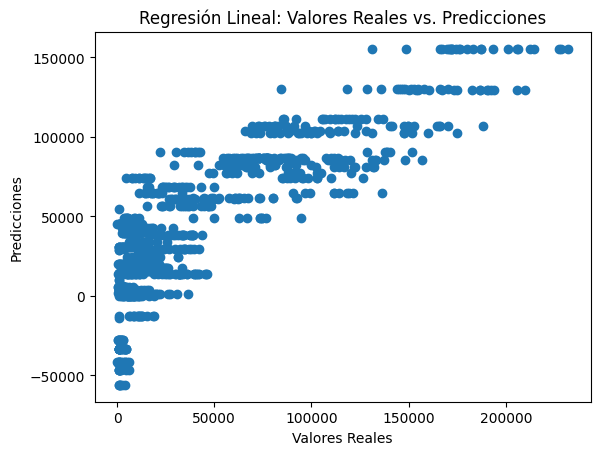

In [ ]:
# @title #**Modelo de Regresión lineal simple**
# Importamos las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Seleccionamos las características (variables independientes) y el objetivo (variable dependiente)
# Nuestras características son 'Grupo_edad' y 'Actividad_economica', y nuestro objetivo es 'Numero_personas'
X = df_cdmx[['Grupo_edad', 'Actividad_economica']]  # Características
y = df_cdmx['Numero_personas']  # Objetivo

# Convertimos las características categóricas en variables dummy para que puedan ser utilizadas en la regresión
X = pd.get_dummies(X)

# Dividimos el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializamos y ajustamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Calculamos el error cuadrático medio (MSE) en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

# Imprimimos los coeficientes del modelo para cada característica
print("Coeficientes del modelo:")
for caracteristica, coeficiente in zip(X.columns, modelo.coef_):
    print(caracteristica, ':', coeficiente)

# Imprimimos el intercepto del modelo
print("Intercepto del modelo:", modelo.intercept_)

# Visualizamos la regresión lineal
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores Reales vs. Predicciones")
plt.show()


### **Paso a paso de nuestro modelo de Regresión lineal**
1. Importamos las bibliotecas necesarias:

  * **pandas** para manipular y analizar datos tabulares.
  * **train_test_split** de sklearn.model_selection para dividir los datos en conjuntos de entrenamiento y prueba.
  * **LinearRegression** de sklearn.linear_model para construir y ajustar el modelo de regresión lineal.
  * **mean_squared_error** de sklearn.metrics para calcular el error cuadrático medio.
  * **matplotlib.pyplot** para visualizar la regresión lineal.

2. Seleccionamos las características (Grupo_edad y Actividad_economica) como variables independientes (X) y la variable dependiente (Numero_personas) como el objetivo (y) del modelo de regresión.

3. Convertimos las características categóricas en variables dummy utilizando pd.get_dummies() para que puedan ser utilizadas en el modelo de regresión lineal.

4. Dividimos el conjunto de datos en conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test) utilizando train_test_split(). En este caso, el 80% de los datos se usan para entrenamiento y el 20% para pruebas.

5. Inicializamos un objeto LinearRegression() como nuestro modelo y lo ajustamos a los datos de entrenamiento (X_train, y_train) utilizando fit().

6. Realizamos predicciones en el conjunto de prueba (X_test) utilizando predict().

7. Calculamos el error cuadrático medio (MSE) entre las predicciones y los valores reales utilizando mean_squared_error().

8. Imprimimos los coeficientes del modelo (las pendientes de las características) y el intercepto utilizando modelo.coef_ y modelo.intercept_.

9. Visualizamos la regresión lineal trazando una gráfica de dispersión que compara los valores reales (y_test) con las predicciones (y_pred). Esto nos da una idea de qué tan bien se ajusta el modelo a los datos.

Error cuadrático medio en conjunto de validación: 885831947.7251083
Error cuadrático medio en conjunto de prueba: 802773252.2930166
Coeficientes del modelo:
Grupo_edad_15 A 24 AÑOS : -2.5989306892435667e+17
Grupo_edad_25 A 44 AÑOS : -2.598930689242844e+17
Grupo_edad_45 A 64 AÑOS : -2.598930689243108e+17
Grupo_edad_65 AÑOS Y MAS : -2.5989306892437e+17
Grupo_edad_NO ESPECIFICADO : -2.598930689243849e+17
Actividad_economica_Agricultura, Ganadería, Silvicultura, Caza y Pesca : -4.241669877746197e+17
Actividad_economica_Comercio : -4.241669877745107e+17
Actividad_economica_Construcción : -4.24166987774591e+17
Actividad_economica_Gobierno y Organismos Internacionales : -4.241669877745783e+17
Actividad_economica_Industria Extractiva y de la Electricidad : -4.24166987774633e+17
Actividad_economica_Industria Manufacturera : -4.241669877745632e+17
Actividad_economica_No Especificado : -4.2416698777462586e+17
Actividad_economica_Restaurantes y Servicios de Alojamiento : -4.241669877745779e+17
Act

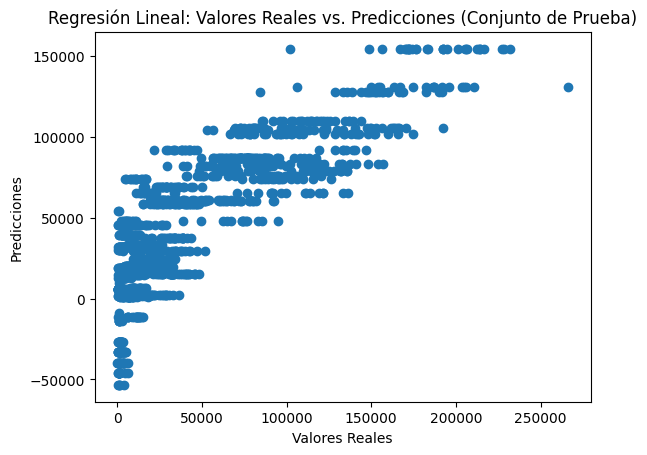

In [ ]:
# @title ##**Modelo de Regresión lineal simple (conjunto de prueba)**
# Seleccionamos las características (variables independientes) y el objetivo (variable dependiente)
# Nuestras características son 'Grupo_edad' y 'Actividad_economica', y nuestro objetivo es 'Numero_personas'
X = df_cdmx[['Grupo_edad', 'Actividad_economica']]  # Características
y = df_cdmx['Numero_personas']  # Objetivo

# Convertimos las características categóricas en variables dummy para que puedan ser utilizadas en la regresión
X = pd.get_dummies(X)

# Dividimos el conjunto de datos en conjunto de entrenamiento, validación y prueba
# Utilizamos train_test_split dos veces para lograr la división deseada
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

# Inicializamos y ajustamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de validación
y_pred_val = modelo.predict(X_val)

# Calculamos el error cuadrático medio (MSE) en el conjunto de validación
mse_val = mean_squared_error(y_val, y_pred_val)
print("Error cuadrático medio en conjunto de validación:", mse_val)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = modelo.predict(X_test)

# Calculamos el error cuadrático medio (MSE) en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
print("Error cuadrático medio en conjunto de prueba:", mse_test)

# Imprimimos los coeficientes del modelo para cada característica
print("Coeficientes del modelo:")
for caracteristica, coeficiente in zip(X.columns, modelo.coef_):
    print(caracteristica, ':', coeficiente)

# Imprimimos el intercepto del modelo
print("Intercepto del modelo:", modelo.intercept_)

# Visualizamos la regresión lineal en el conjunto de prueba
plt.scatter(y_test, y_pred_test)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores Reales vs. Predicciones (Conjunto de Prueba)")
plt.show()

###**Analisis de los resultados obtenidos en el modelo de Regresión Lineal Simple**


*   Dada la magnitud del error cuadrático medio (MSE), que es muy alto (en el orden de 10^8), y los coeficientes del modelo que son extremadamente grandes (en el orden de 10^17), podemos concluir que el modelo de regresión lineal no fue efectivo en este caso. Estos resultados sugieren que el modelo no logró capturar la relación entre las variables de entrada (Grupo_edad, Actividad_economica) y la variable de salida (Numero_personas) de manera adecuada.


Error cuadrático medio en conjunto de validación: 414765305.16233766
Error cuadrático medio en conjunto de prueba: 383545345.6205903
Coeficientes del modelo: [ 7.29420138e+12 -6.69510338e+17  1.24232934e+16  1.29374067e+16
 -2.14618837e+17 -4.12059280e+17  1.61743640e+17  8.28271784e+16
  7.42927782e+15  4.97141583e+17  4.97317722e+17  5.65269632e+15
  3.53624827e+17 -5.04157870e+17 -3.38046375e+17 -2.23509456e+17
 -2.33703819e+17  7.42255694e+16  3.04811988e+17 -5.98462691e+16
 -1.55299765e+16 -4.37282547e+16  7.24891608e+15  2.91282228e+16
 -6.41753546e+16  1.35187202e+17  3.00370420e+16 -1.41532682e+17
 -2.30006455e+17 -1.17076629e+17 -8.57301497e+16  5.54946880e+16
  3.84449197e+16 -8.57216719e+16 -6.30160615e+16 -3.92426373e+17
  1.45320500e+16 -5.96911174e+16 -2.82083835e+16  4.44329529e+16
 -4.88706245e+16  1.50491932e+17  4.53417721e+16 -1.26227951e+17
 -2.14701725e+17 -1.01771899e+17 -7.04254196e+16  7.07994180e+16
  5.37496498e+16 -7.04169418e+16 -4.77113314e+16 -4.88096210e+

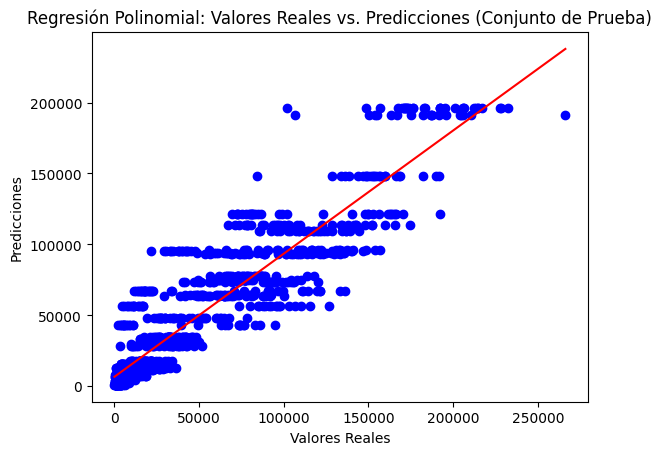

In [ ]:
# @title ##**Modelo de Regresión Polinomial  (conjunto de prueba)**

#Importamos las librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


# Seleccionamos las características (variables independientes) y el objetivo (variable dependiente)
# Nuestras características son 'Grupo_edad' y 'Actividad_economica', y nuestro objetivo es 'Numero_personas'
X = df_cdmx[['Grupo_edad', 'Actividad_economica']]  # Variables independientes o caracteristicas
y = df_cdmx['Numero_personas']  # Objetivo o variable dependiente

# Convertimos las características categóricas en variables dummy para que puedan ser utilizadas en la regresión
X = pd.get_dummies(X)

# Dividimos el conjunto de datos en conjunto de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.75, random_state=42)

# Creamos una instancia del transformador de características polinomiales de grado 2
poly_features = PolynomialFeatures(degree=2)

# Transformamos las características originales en características polinomiales
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)
X_test_poly = poly_features.transform(X_test)

# Inicializamos y ajustamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train_poly, y_train)

# Realizamos predicciones en el conjunto de validación
y_pred_val = modelo.predict(X_val_poly)

# Calculamos el error cuadrático medio (MSE) en el conjunto de validación
mse_val = mean_squared_error(y_val, y_pred_val)
print("Error cuadrático medio en conjunto de validación:", mse_val)

# Realizamos predicciones en el conjunto de prueba
y_pred_test = modelo.predict(X_test_poly)

# Calculamos el error cuadrático medio (MSE) en el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)
print("Error cuadrático medio en conjunto de prueba:", mse_test)

# Imprimimos el coeficiente del modelo
print("Coeficientes del modelo:", modelo.coef_)

# Imprimimos el intercepto del modelo
print("Intercepto del modelo:", modelo.intercept_)

# Visualizamos la regresión polinomial en el conjunto de prueba
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_pred_test, 1))(np.unique(y_test)), color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Polinomial: Valores Reales vs. Predicciones (Conjunto de Prueba)")
plt.show()


📋

###**Analisis de los resultados obtenidos en el modelo de Regresión Polinomial**

Después de analizar los resultados, concluimos que el modelo de regresión polinomial no fue efectivo en este caso. Nuestra interpretación se basa en los siguientes puntos:

  * Error Cuadrático Medio (ECM): Observamos que tanto el ECM en el conjunto de validación como en el conjunto de pruebas son muy altos. Esto indica que el modelo no se ajusta bien a los datos, ya que hay una gran diferencia entre los valores reales y las predicciones del modelo.

  * Coeficientes del Modelo: Al analizar los coeficientes del modelo, encontramos que son extremadamente grandes y variados en magnitud. Esto sugiere que el modelo está sobreajustado a los datos de entrenamiento, lo que resulta en coeficientes poco realistas y difíciles de interpretar. Además, el intercepto del modelo también es muy grande.

#**Conclusiones** 💯

Después de probar tanto el modelo de regresión lineal simple como el modelo de regresión polinomial y encontrar que ninguno de ellos fue efectivo, podemos llegar a varias conclusiones:

1. **Complejidad del modelo:** Ambos modelos, tanto el lineal como el polinomial, pueden haber sido demasiado simples o demasiado complejos para capturar la verdadera relación entre las características y la variable objetivo. El modelo lineal simple puede haber sido demasiado básico para capturar las relaciones no lineales en los datos, mientras que el modelo polinomial puede haber sido demasiado flexible y propenso al sobreajuste.

2. **Selección de características:** Es posible que las características seleccionadas no hayan sido las más apropiadas para predecir la variable objetivo. Podría ser necesario explorar otras características o realizar un análisis más detallado para identificar las variables más relevantes para el problema en cuestión.

3. **Sobreajuste:** El modelo de regresión polinomial claramente mostró signos de sobreajuste, como lo demuestran los coeficientes extremadamente grandes y variados. Esto sugiere que el modelo se ajustó demasiado a los datos de entrenamiento y no pudo generalizar bien a nuevos datos.

4. **Necesidad de explorar otros modelos:** Dado que los modelos de regresión lineal simple y polinomial no fueron efectivos, es evidente que necesitamos explorar otros tipos de modelos. Podríamos considerar modelos más avanzados como árboles de decisión, máquinas de vectores de soporte (SVM), modelos de ensamble o incluso modelos de redes neuronales. Es posible que estos modelos sean capaces de capturar relaciones más complejas en los datos y proporcionar predicciones más precisas.

En resumen, las conclusiones nos llevan a la necesidad de realizar una investigación más profunda sobre las características y la selección de modelos, así como a explorar otras técnicas de modelado más avanzadas para abordar el problema en cuestión.